In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('F:jupyter\data_cleaned.csv')

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
#seperating independent and dependent variables
x=data.drop(['Survived'],axis=1)
y=data[['Survived']]

In [6]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [7]:
x = pd.DataFrame(x_scaled, columns = x.columns)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,stratify=y)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(668, 24)
(668, 1)
(223, 24)
(223, 1)


In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [15]:
clf=KNN(n_neighbors=5)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
k =f1_score(y_pred, y_test)
print('Test F1 Score    ', k )

Test F1 Score     0.6909090909090908


In [38]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(x_train, y_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x_test)
        tmp = f1_score(tmp,y_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [39]:
#Defining K range
k = range(6, 20, 2)

Text(0.5, 1.0, 'Elbow Curve for test')

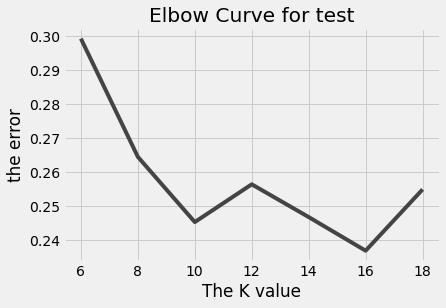

In [46]:
# calling above defined function
test = Elbow(k)
plt.style.use('fivethirtyeight')
plt.plot(k,test,color='#444444')
plt.xlabel('The K value')
plt.ylabel('the error')
plt.title('Elbow Curve for test')


In [51]:
clf=KNN(n_neighbors=16)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
f=f1_score(y_pred,y_test)
f

0.7631578947368421